## Machine Learning Online Class - Exercise 2: Logistic Regression

  Instructions
  ------------

  This file contains code that helps you get started on the logistic
  regression exercise. You will need to complete the following functions
  in this exericse:

     sigmoid.m
     costFunction.m
     predict.m
     costFunctionReg.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

from ex2.plotData import plotData
from ex2.costFunction import costFunction
from ex2.plotDecisionBoundary import plotDecisionBoundary
from ex2.predict import predict
from ex2.sigmoid import sigmoid

In [2]:
# Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = pd.read_csv('ex2data1.txt', header=None)
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, 2]).reshape(-1, 1)
X.shape, y.shape

((100, 2), (100, 1))

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


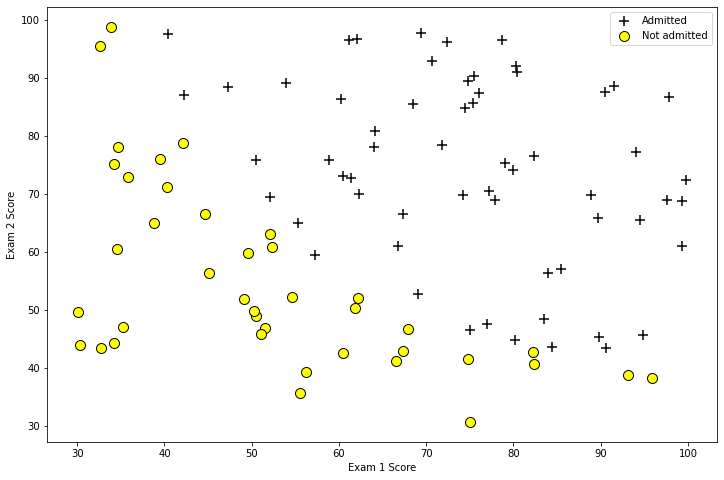

In [3]:
# ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

ax = plotData(X, y)

# Labels and Legend
h, _ = ax.get_legend_handles_labels()
ax.legend(h, ['Admitted', 'Not admitted'])
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# Specified in plot order
plt.show()

In [4]:
# ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in
#  costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.insert(X, 0, np.ones(m), axis=1)

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): %.3f\n' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
print(' {:.4f} {:.4f} {:.4f}'.format(*list(*grad)))
print('Expected gradients (approx):\n -0.1000 -12.0092 -11.2628')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24, 0.2, 0.2]])
cost, grad = costFunction(test_theta, X, y)

print('\nCost at test theta: %.3f' % cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
print(' {:.3f} {:.3f} {:.3f}'.format(*list(*grad)))
print('Expected gradients (approx):\n 0.043 2.566 2.647')

Cost at initial theta (zeros): 0.693

Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.1000 -12.0092 -11.2628
Expected gradients (approx):
 -0.1000 -12.0092 -11.2628

Cost at test theta: 0.218
Expected cost (approx): 0.218
Gradient at test theta: 
 0.043 2.566 2.647
Expected gradients (approx):
 0.043 2.566 2.647


Cost at theta found by fminunc: 0.203
Expected cost (approx): 0.203
theta: 
 -25.161 0.206 0.201
Expected theta (approx):
 -25.161 0.206 0.201


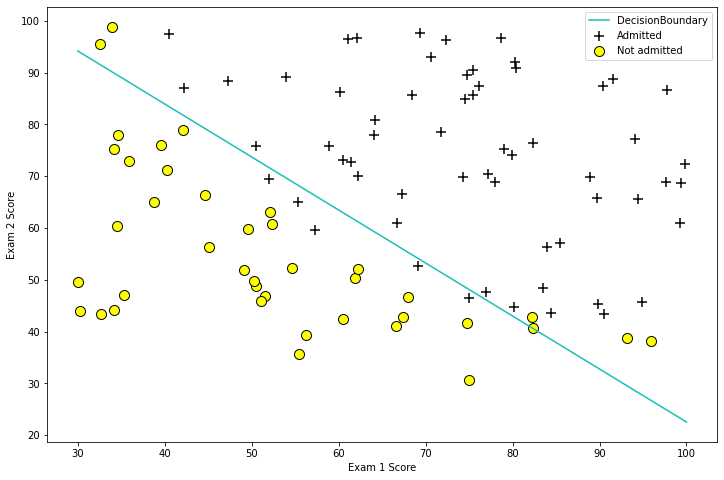

In [5]:
# ============= Part 3: Optimizing using fminunc  =============
# MATLAB使用的是fminunc，我们用fmin_tnc函数替代
# fmin_tnc == minimize使用TNC方法


t = np.zeros(3).reshape(1, -1)  # 提供初始值

theta, _, _ = opt.fmin_tnc(func=costFunction, x0=t, args=(X, y))
cost, _ = costFunction(theta, X, y)

# Print theta to screen
print('Cost at theta found by fminunc: %.3f' % cost)
print('Expected cost (approx): 0.203')
print('theta: ')
print(' {:.3f} {:.3f} {:.3f}'.format(*theta))
print('Expected theta (approx):')
print(' -25.161 0.206 0.201')

# Plot Boundary
ax = plotDecisionBoundary(theta, X, y)

# Labels and Legend
h, _ = ax.get_legend_handles_labels()
ax.legend(h, ['DecisionBoundary', 'Admitted', 'Not admitted'])
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [6]:
# ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of
#  our model.
#
#  Your task is to complete the code in predict.m

#  Predict probability for a student with score 45 on exam 1
#  and score 85 on exam 2

prob = sigmoid(np.array([[1, 45, 85]]) @ theta)
print('For a student with scores 45 and 85\nwe predict an admission probability of %.3f' % prob)
print('Expected value: 0.775 +/- 0.002')

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.2f' % (np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85
we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002
Train Accuracy: 89.00
Expected accuracy (approx): 89.0
